# Project 2 : Classification of Hsp70 proteins into taxonomic groups based on their amino acid sequences
 This notebook shows how we prepare the dataset, train the model and analyze the features importance. This notebook does not contain the code to compute the variation of the results (performances and feature importance), as this simply repeats what this notebook does but 30 times to obtain a statistical representation of the computed quantities. The code to be able to compute the mean and standard deviation (given in the report), is still provided in an additional notebook called `Notebook_MTP_project2_results.ipynb` . Some cells may take a lot of time to run (especially the hyperparameters optimizations) so please be aware of the estimated time indications. These time indications have been estimated using the CPU of a standard laptop.

## Table of contents
1. [Import libraries](#1.-Import-libraries)
2. [Importing and treating the dataset](#2.-Importing-and-treating-the-data-set)
3. [T-distributed stochatic neighbor embedding](#3.-TSNE)
4. [Mutual information](#4.-Mutual-information)
5. [Training of the random forest](#5.-Random-Forest)
6. [Training of the Neural Network](#6.-Neural-Network)
7. [Features importance](#7.-Features-importance)

## 1. Import libraries and install requirements
The first cell download all the required libraries. See README.md for more informations

In [5]:
%pip install -q --upgrade --user -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [17]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 --user

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.1.2%2Bcu118-cp311-cp311-win_amd64.whl (2722.7 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.2.1
    Uninstalling torch-2.2.1:
      Successfully uninstalled torch-2.2.1
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.


In [ ]:
torch.cuda.is_available()

In [6]:
# Useful starting lines
%matplotlib inline
import numpy as np

%load_ext autoreload
%autoreload 2

import pandas as pd

from create_batch import *
from datatreatment import *
from neuralnet import *
from visualisations import *
from mutual_info import *
from TSNE import *
from train_rdf import *
from rdf_hyperpara_opti import *
from nn_hyperpara_opti import *
from extract_positions import *
from Test_Job import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
number of Pseudomonadota : 
{23889}
---------
number of Terrabacteriagroup : 
{19458}
---------
number of FCBgroup : 
{5211}
---------
number of Bacteriaincertaesedis : 
{2557}
---------
number of PVCgroup : 
{2126}
---------
number of Campylobacterota : 
{1082}
---------
shape of dataframe : (54323, 11450)


C:\Users\pierr\Desktop\Semester_project_Ma2\datatreatment.py:279: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.iloc[:, 0] = data.iloc[:, 0].replace(map_dict)


Epoch [1/15], Training Loss: 0.0365
Epoch [1/15], Validation Loss: 0.0465
Epoch [1/15], Validation Accuracy: 98.9691%
Epoch [2/15], Training Loss: 0.0794
Epoch [2/15], Validation Loss: 0.0422
Epoch [2/15], Validation Accuracy: 99.0427%
Epoch [3/15], Training Loss: 0.0070
Epoch [3/15], Validation Loss: 0.0446
Epoch [3/15], Validation Accuracy: 99.1348%
Epoch [4/15], Training Loss: 0.0056
Epoch [4/15], Validation Loss: 0.0421
Epoch [4/15], Validation Accuracy: 99.0795%
Epoch [5/15], Training Loss: 0.1494
Epoch [5/15], Validation Loss: 0.0475
Epoch [5/15], Validation Accuracy: 99.1348%
Epoch [6/15], Training Loss: 0.0201
Epoch [6/15], Validation Loss: 0.0483
Epoch [6/15], Validation Accuracy: 99.0059%
Epoch [7/15], Training Loss: 0.0071
Epoch [7/15], Validation Loss: 0.0474
Epoch [7/15], Validation Accuracy: 99.0243%
Epoch [8/15], Training Loss: 0.0216
Epoch [8/15], Validation Loss: 0.0555
Epoch [8/15], Validation Accuracy: 99.0979%
Epoch [9/15], Training Loss: 0.0038
Epoch [9/15], Valida

## 2. Importing and treating the dataset
This section performs the feature embedding and selects the level of taxonomy where the model will be trained. Make sure to change the path_to_dataset variable. This section can be run in more or less 10 seconds.

In [3]:
path_to_dataset ="C:\\Users\\pierr\\OneDrive\\Bureau\\Semester_project_MA2\\dataset_hsp70_tax.csv" 
#path_to_dataset ="C:\\Users\\pierr\\Desktop\\Semester_project_Ma2\\dataset_hsp70_tax\\dataset_hsp70_tax.csv"
hsp70 = importing_data(path_to_dataset)

     Source  Target  Nbr Sources     pos_y  Count                    Colors
108      65     675     0.333333  0.333333  23889   rgba(158, 161, 71,0.13)
111      65     155     0.333333  0.333333  19458  rgba(236, 196, 163,0.74)
381     465     351     0.333333  0.333333  25989   rgba(61, 242, 116,0.81)
491     187     596     1.000000  1.000000  18046  rgba(249, 219, 114,0.34)
537     351     187     0.666667  0.666667  18059    rgba(41, 33, 154,0.27)
567     675     424     0.666667  0.666667  13237    rgba(81, 93, 242,0.27)
699     113      65     0.000000  0.000000  59810    rgba(23, 23, 235,0.35)
700     113     465     0.000000  0.000000  36377   rgba(156, 56, 210,0.82)


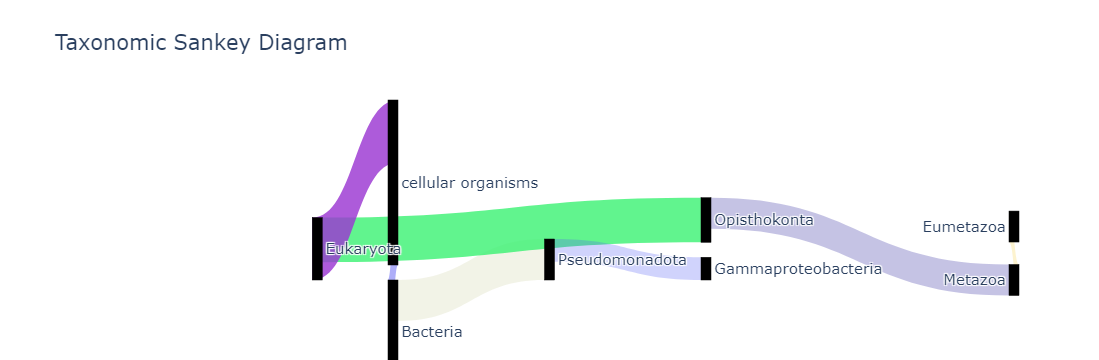

In [44]:
create_sankey_diagram(hsp70,5, 10000, node_pad=15, node_thickness=10, node_label_size=15)

In [135]:
level3, level3_categ= get_data(hsp70, 3, 6,"Bacteria",Use_Others=False)
level3=encode01(level3)
level3=category_to_int(level3,level3_categ)

number of Pseudomonadota : 
{23889}
---------
number of Terrabacteriagroup : 
{19458}
---------
number of FCBgroup : 
{5211}
---------
number of Bacteriaincertaesedis : 
{2557}
---------
number of PVCgroup : 
{2126}
---------
number of Campylobacterota : 
{1082}
---------
shape of dataframe : (54323, 11450)


C:\Users\pierr\Desktop\Semester_project_Ma2\datatreatment.py:279: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [136]:
train, train_label, test, test_label, val, val_label=split_dataset(level3, 0.8, 0.1, 0.1)

In [31]:
print(locals())
del level3,level3_categ
print(globals)

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', 'print(globals())', "# Useful starting lines\nget_ipython().run_line_magic('matplotlib', 'inline')\nimport numpy as np\n\nget_ipython().run_line_magic('load_ext', 'autoreload')\nget_ipython().run_line_magic('autoreload', '2')\n\nimport pandas as pd\n\nfrom create_batch import *\nfrom datatreatment import *\nfrom neuralnet import *\nfrom visualisations import *\nfrom mutual_info import *\nfrom TSNE import *\nfrom train_rdf import *\nfrom rdf_hyperpara_opti import *\nfrom nn_hyperpara_opti import *", '#path_to_dataset ="C:\\\\Users\\\\pierr\\\\OneDrive\\\\Bureau\\\\Semester_project_MA2\\\\dataset_hsp70_tax.csv" \npath_to_dataset ="C:\\\\Users\\\\pierr\\\\Desktop\\\\Semester_project_Ma2\\\\dataset_hsp70_tax\\\\dataset_hsp70

NameError: name 'level3' is not defined

In [36]:
train_label

tensor([0, 1, 1,  ..., 0, 0, 0], dtype=torch.int8)

## 3. TSNE
This section performs the T-distributed stochatic neighbor embedding analysis. If done on the entire dataset, it takes 30 minutes. It can also be done on a smaller set by changing the argument of the split_dataset() function.
`X_tsne,labels_tsne,_,_,_,_=split_dataset(level3, 0.1, 0, 0)` will only execute the analysis on 10% of the dataset. Note that TSNE contains randomness, so results may vary slightly from the report and if you change the size of the subset you may need to adapt the complexity (typically a complexitiy of 150 works great with 50% of the dataset).

In [ ]:
perplexity = 350
X_tsne, labels_tsne, _, _, _, _=split_dataset(level3, 1, 0, 0)
tsne = compute_tsne(X_tsne, perplexity)
plot_tsne(tsne, labels_tsne,level3_categ)

## 4. Mutual information
This section computes the mutual information of the features in the dataset. The computation takes approximately 2 hours but can be done on a subset of the entire dataset. `mutual_data = compute_mutual_info(level3,0.1)` will perform the computation on 10 % of the dataset. We also provide a txt file `mutual_data.txt`that contains the calculated values. So, if you want to proceed without waiting for the computation (`mutual_data` is used further), just run the second cell.

In [5]:
mutual_data = compute_mutual_info(level3,0.5)
np.savetxt('mutual_data.txt', mutual_data)

Mutual info computed in 1179.6471717357635 seconds


In [5]:
mutual_data = np.loadtxt('mutual_data.txt',dtype=float)

## 5. Random Forest
This section does the training and hyperparameters optimization of the Random Forest. The hyperparameters optimization for the grid done below takes 14 hours to run. The second cell contains the optimal parameters discribed in the report, so skip the first cell if you don't want to go through the hyperparameter optimizations. The training of the Random Forest, with the hyperparameters that we selected, takes 4 minutes.

In [27]:
parameter_grid = {
        'n_estimators': [50,100],
        'max_depth':[200,300,400],
        'max_features':[100,200,400],
        'bootstrap':[False,True],
        'class_weight':['balanced'], 
        'min_samples_leaf':[5,10,20]
        }
train, train_label, test, test_label, val, val_label=split_dataset(level3, 0.8, 0.1, 0.1)


best_para = optimize_hyperparameters_rf(train, train_label, test, test_label,parameter_grid,15)

Hyperparameters: {'n_estimators': 50, 'max_depth': 200, 'max_features': 100, 'bootstrap': False, 'class_weight': 'balanced', 'min_samples_leaf': 5}, Mean Validation F1 Score: 0.9482660636318134, Std Validation F1 Score: 0.003081218817447622
Hyperparameters: {'n_estimators': 50, 'max_depth': 200, 'max_features': 100, 'bootstrap': False, 'class_weight': 'balanced', 'min_samples_leaf': 10}, Mean Validation F1 Score: 0.9355854658951667, Std Validation F1 Score: 0.002970405392548438


KeyboardInterrupt: 

In [6]:
best_para = ({'n_estimators': 100, 'max_depth': 400, 'max_features': 400, 'bootstrap': False, 'class_weight': 'balanced', 'min_samples_leaf': 5}, 0, 0)

Parameters are: {'n_estimators': 100, 'max_depth': 400, 'max_features': 400, 'bootstrap': False, 'class_weight': 'balanced', 'min_samples_leaf': 5}
Training done
Accuracy: 97.8432%, F1 Weighted Score: 0.9783, F1 Macro score: 0.9642


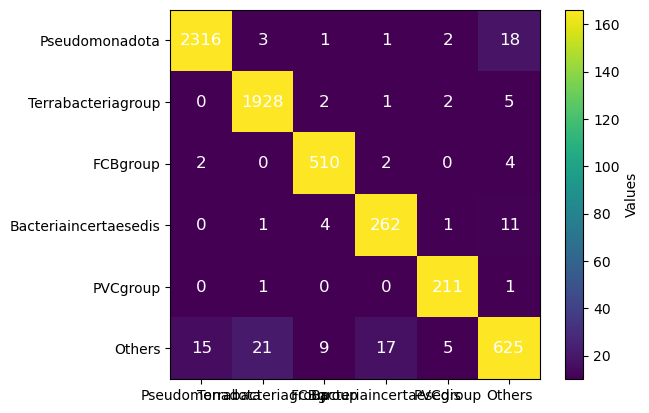

In [7]:
model_rdf = train_random_forest(train, train_label,test, test_label,best_para[0])
val_pred = model_rdf.predict(val)
convolution_matrix(val_label,val_pred,level3_categ)

## 6. Neural Network
This section does the training and hyperparameters optimization of the Neural Network. The hyperparameters optimization for the grid done below takes 14 hours to run using a GPU. The second cell contains the optimal parameters discribed in the report, so skip the first cell if you don't want to go through the hyperparameter optimization. Also, don't execute the second one if you want to use your optimized hyperparameters. The training of the Neural Network, with the hyperparameters that we selected, takes 20 seconds if a GPU is used and 4 minutes the computation is done on the CPU.

In [204]:
param_grid = {
        'layer_dim': [64,128,256],
        'number_hidden_layer': [2,3],
        'dropout_prob': [0.2,0.3],
        'l2_regu': [1e-05],
        'weight_decay': [0.0001],
        'learning_rate':[0.001, 0.0001],
        'batch_size':[256, 128],
        'num_epochs':[10,15]
        }

positions_to_keep =range(550,600)

level3_extracted = extract_positions(level3,positions_to_keep)


train, train_label, test, test_label, val, val_label=split_dataset(level3, 0.8, 0.1, 0.1)
cv=5
output_dim = 6
best_params_nn, mean_f1_score_nn, std_f1_score_nn = optimize_hyperparameters_nn(train, train_label, val, val_label, cv,output_dim,param_grid)

time: 27.459514617919922

Hyperparameters: {'layer_dim': 32, 'number_hidden_layer': 1, 'dropout_prob': 0.2, 'l2_regu': 1e-05, 'weight_decay': 0.0001, 'learning_rate': 0.001, 'batch_size': 128, 'num_epochs': 15}, Mean Validation F1 Score: 0.9899284259112442, Std Validation F1 Score: 0.0011772340719100611

time: 61.32535195350647

Hyperparameters: {'layer_dim': 32, 'number_hidden_layer': 1, 'dropout_prob': 0.2, 'l2_regu': 1e-05, 'weight_decay': 0.0001, 'learning_rate': 0.001, 'batch_size': 128, 'num_epochs': 20}, Mean Validation F1 Score: 0.9900789492708437, Std Validation F1 Score: 0.0007304127317750568

time: 111.27972364425659

Hyperparameters: {'layer_dim': 32, 'number_hidden_layer': 1, 'dropout_prob': 0.2, 'l2_regu': 1e-05, 'weight_decay': 0.0001, 'learning_rate': 0.001, 'batch_size': 64, 'num_epochs': 15}, Mean Validation F1 Score: 0.9892763452959403, Std Validation F1 Score: 0.00046973328115332855

time: 175.75255012512207

Hyperparameters: {'layer_dim': 32, 'number_hidden_layer':

KeyboardInterrupt: 

In [205]:
best_params_nn = {'layer_dim': 64, 'number_hidden_layer': 3, 'dropout_prob': 0.2, 'l2_regu': 1e-05, 'weight_decay': 0.0001, 'learning_rate': 0.001, 'batch_size': 128, 'num_epochs': 15}

In [ ]:
#best_params_nn = {'layer_dim': 256, 'number_hidden_layer': 3, 'dropout_prob': 0.2, 'l2_regu': 1e-05, 'weight_decay': 0.0001, 'learning_rate': 0.0001, 'batch_size': 256, 'num_epochs': 10}

In [206]:
layer_dim = best_params_nn['layer_dim']
number_hidden_layer = best_params_nn['number_hidden_layer']
dropout_prob = best_params_nn['dropout_prob']
l2_regu = best_params_nn['l2_regu']
weight_decay = best_params_nn['weight_decay']
learning_rate = best_params_nn['learning_rate']
batch_size = best_params_nn['batch_size']
num_epochs = best_params_nn['num_epochs']

#train, train_label, test, test_label, val, val_label=split_dataset(level3, 0.8, 0.1, 0.1)
train = torch.cat([train,val],dim = 0)
train_label = torch.cat([train_label,val_label],dim = 0)
input_dim = train.shape[1]
output_dim = 6

Epoch [1/15], Training Loss: 0.0062
Epoch [1/15], Validation Loss: 0.0513
Epoch [1/15], Validation Accuracy: 98.9138%
Epoch [2/15], Training Loss: 0.0151
Epoch [2/15], Validation Loss: 0.0506
Epoch [2/15], Validation Accuracy: 98.9323%
Epoch [3/15], Training Loss: 0.0145
Epoch [3/15], Validation Loss: 0.0472
Epoch [3/15], Validation Accuracy: 99.0611%
Epoch [4/15], Training Loss: 0.0116
Epoch [4/15], Validation Loss: 0.0592
Epoch [4/15], Validation Accuracy: 98.9138%
Epoch [5/15], Training Loss: 0.0355
Epoch [5/15], Validation Loss: 0.0613
Epoch [5/15], Validation Accuracy: 98.9507%
Epoch [6/15], Training Loss: 0.0028
Epoch [6/15], Validation Loss: 0.0609
Epoch [6/15], Validation Accuracy: 99.0611%
Epoch [7/15], Training Loss: 0.0393
Epoch [7/15], Validation Loss: 0.0621
Epoch [7/15], Validation Accuracy: 98.8218%
Epoch [8/15], Training Loss: 0.0075
Epoch [8/15], Validation Loss: 0.0623
Epoch [8/15], Validation Accuracy: 99.0427%
Epoch [9/15], Training Loss: 0.0111
Epoch [9/15], Valida

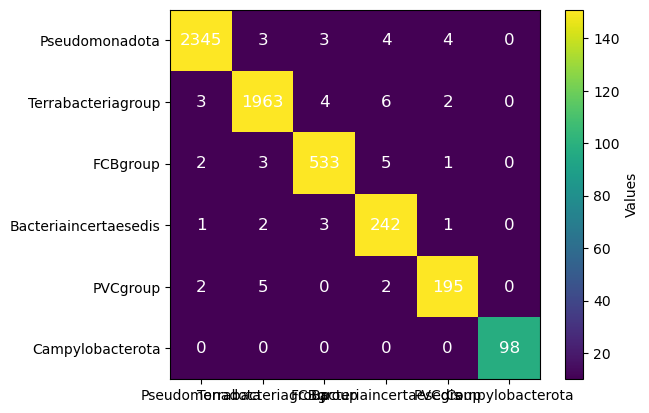

In [207]:
model_neural = ModelClassification(input_dim, output_dim, layer_dim, number_hidden_layer, dropout_prob, l2_regu)
optimizer = torch.optim.Adam(model_neural.parameters(), lr = learning_rate, weight_decay=weight_decay)
train_model(model_neural, num_epochs, train, train_label, test, test_label, optimizer, batch_size)


if torch.cuda.is_available():
    model_neural = model_neural.cpu()
test_outputs = model_neural(test)
test_pred = test_outputs.argmax(dim=1)
convolution_matrix(test_label,test_pred,level3_categ)

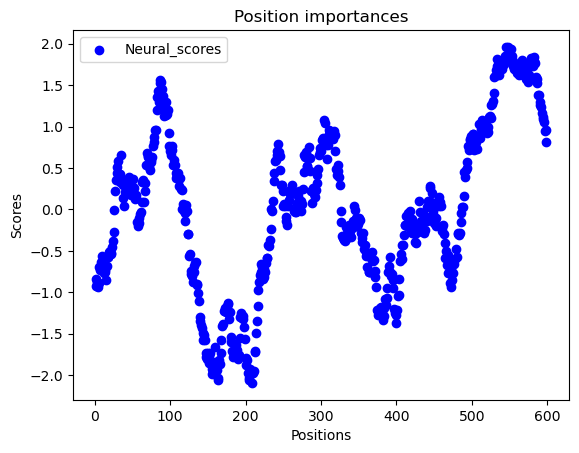

,Neural_scores
pos_1,-0.929144
pos_2,-0.835949
pos_3,-0.871324
pos_4,-0.941731
pos_5,-0.884502
...,...
pos_595,1.115224
pos_596,1.055999
pos_597,0.944460
pos_598,0.956640


In [211]:
feature_importances_neural(model_neural, level3, smoothness = 30, plot = 1)

Epoch [1/15], Training Loss: 1.3056
Epoch [1/15], Validation Loss: 1.2040
Epoch [1/15], Validation Accuracy: 77.7982%
Epoch [2/15], Training Loss: 0.9899
Epoch [2/15], Validation Loss: 0.9547
Epoch [2/15], Validation Accuracy: 78.7371%
Epoch [3/15], Training Loss: 0.9436
Epoch [3/15], Validation Loss: 0.8266
Epoch [3/15], Validation Accuracy: 78.7739%
Epoch [4/15], Training Loss: 0.8520
Epoch [4/15], Validation Loss: 0.7668
Epoch [4/15], Validation Accuracy: 78.9028%
Epoch [5/15], Training Loss: 0.6853
Epoch [5/15], Validation Loss: 0.7274
Epoch [5/15], Validation Accuracy: 79.0685%
Epoch [6/15], Training Loss: 0.8688
Epoch [6/15], Validation Loss: 0.6927
Epoch [6/15], Validation Accuracy: 79.1605%
Epoch [7/15], Training Loss: 0.8039
Epoch [7/15], Validation Loss: 0.6516
Epoch [7/15], Validation Accuracy: 79.1421%
Epoch [8/15], Training Loss: 0.8897
Epoch [8/15], Validation Loss: 0.6182
Epoch [8/15], Validation Accuracy: 79.1421%
Epoch [9/15], Training Loss: 0.7766
Epoch [9/15], Valida

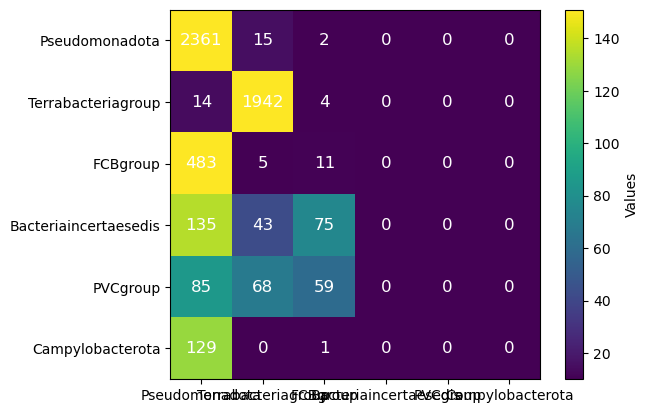

In [220]:
positions_to_keep =range(500,600)

level3_extracted = extract_positions(level3,positions_to_keep)

layer_dim = best_params_nn['layer_dim']
number_hidden_layer = best_params_nn['number_hidden_layer']
dropout_prob = best_params_nn['dropout_prob']
l2_regu = best_params_nn['l2_regu']
weight_decay = best_params_nn['weight_decay']
learning_rate = best_params_nn['learning_rate']
batch_size = best_params_nn['batch_size']
num_epochs = best_params_nn['num_epochs']

train, train_label, test, test_label, val, val_label=split_dataset(level3_extracted, 0.8, 0.1, 0.1)
train = torch.cat([train,val],dim = 0)
train_label = torch.cat([train_label,val_label],dim = 0)
input_dim = train.shape[1]
output_dim = 6

model_neural = ModelClassification(input_dim, output_dim, layer_dim, number_hidden_layer, dropout_prob, l2_regu)
optimizer = torch.optim.Adam(model_neural.parameters(), lr = learning_rate, weight_decay=weight_decay)
train_model(model_neural, num_epochs, train, train_label, test, test_label, optimizer, batch_size)


if torch.cuda.is_available():
    model_neural = model_neural.cpu()
test_outputs = model_neural(test)
test_pred = test_outputs.argmax(dim=1)
convolution_matrix(test_label,test_pred,level3_categ)

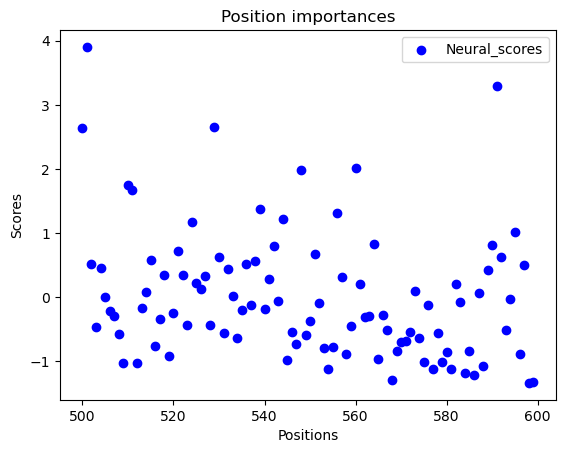

,Neural_scores
pos_500,2.638838
pos_501,3.904087
pos_502,0.519196
pos_503,-0.476639
pos_504,0.457643
...,...
pos_595,1.017287
pos_596,-0.897680
pos_597,0.494514
pos_598,-1.344236


In [221]:
feature_importances_neural(model_neural, level3_extracted, smoothness = 1, pos =positions_to_keep, plot = 1)

Epoch [1/15], Training Loss: 0.2427
Epoch [1/15], Validation Loss: 0.2447
Epoch [1/15], Validation Accuracy: 92.6178%
Epoch [2/15], Training Loss: 0.1344
Epoch [2/15], Validation Loss: 0.1426
Epoch [2/15], Validation Accuracy: 95.9131%
Epoch [3/15], Training Loss: 0.1008
Epoch [3/15], Validation Loss: 0.1271
Epoch [3/15], Validation Accuracy: 96.7415%
Epoch [4/15], Training Loss: 0.0888
Epoch [4/15], Validation Loss: 0.1159
Epoch [4/15], Validation Accuracy: 97.0177%
Epoch [5/15], Training Loss: 0.1235
Epoch [5/15], Validation Loss: 0.1160
Epoch [5/15], Validation Accuracy: 96.8704%
Epoch [6/15], Training Loss: 0.1286
Epoch [6/15], Validation Loss: 0.1145
Epoch [6/15], Validation Accuracy: 96.9993%
Epoch [7/15], Training Loss: 0.0831
Epoch [7/15], Validation Loss: 0.1123
Epoch [7/15], Validation Accuracy: 97.1097%
Epoch [8/15], Training Loss: 0.0593
Epoch [8/15], Validation Loss: 0.1115
Epoch [8/15], Validation Accuracy: 97.2938%
Epoch [9/15], Training Loss: 0.1141
Epoch [9/15], Valida

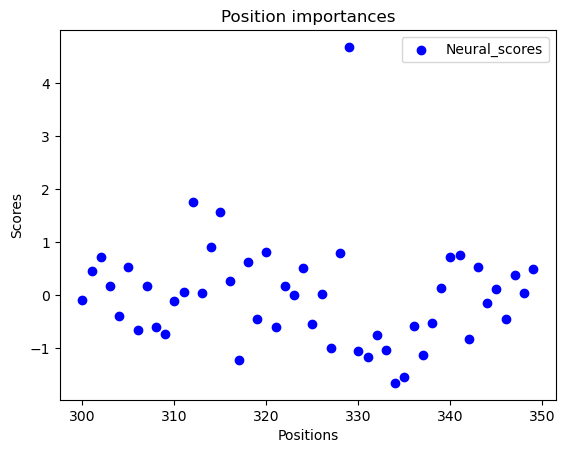

Got to iteration 1 in 11.866899728775024 seconds
Epoch [1/15], Training Loss: 0.2126
Epoch [1/15], Validation Loss: 0.2345
Epoch [1/15], Validation Accuracy: 93.2437%
Epoch [2/15], Training Loss: 0.1320
Epoch [2/15], Validation Loss: 0.1730
Epoch [2/15], Validation Accuracy: 94.9742%
Epoch [3/15], Training Loss: 0.1403
Epoch [3/15], Validation Loss: 0.1371
Epoch [3/15], Validation Accuracy: 96.5574%
Epoch [4/15], Training Loss: 0.1308
Epoch [4/15], Validation Loss: 0.1290
Epoch [4/15], Validation Accuracy: 96.7599%
Epoch [5/15], Training Loss: 0.1105
Epoch [5/15], Validation Loss: 0.1253
Epoch [5/15], Validation Accuracy: 96.6679%
Epoch [6/15], Training Loss: 0.1252
Epoch [6/15], Validation Loss: 0.1302
Epoch [6/15], Validation Accuracy: 96.5943%
Epoch [7/15], Training Loss: 0.1173
Epoch [7/15], Validation Loss: 0.1205
Epoch [7/15], Validation Accuracy: 96.9440%
Epoch [8/15], Training Loss: 0.1321
Epoch [8/15], Validation Loss: 0.1199
Epoch [8/15], Validation Accuracy: 96.6495%
Epoch [

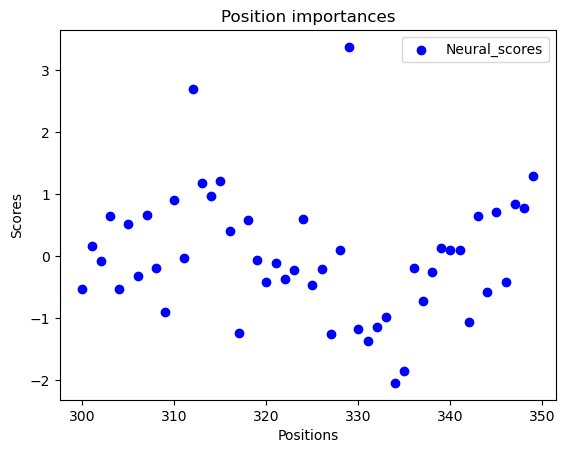

Got to iteration 2 in 24.144301176071167 seconds
Epoch [1/15], Training Loss: 0.3327
Epoch [1/15], Validation Loss: 0.2356
Epoch [1/15], Validation Accuracy: 92.7467%
Epoch [2/15], Training Loss: 0.1189
Epoch [2/15], Validation Loss: 0.1537
Epoch [2/15], Validation Accuracy: 95.8763%
Epoch [3/15], Training Loss: 0.0854
Epoch [3/15], Validation Loss: 0.1347
Epoch [3/15], Validation Accuracy: 96.2813%
Epoch [4/15], Training Loss: 0.1899
Epoch [4/15], Validation Loss: 0.1331
Epoch [4/15], Validation Accuracy: 96.4102%
Epoch [5/15], Training Loss: 0.1158
Epoch [5/15], Validation Loss: 0.1175
Epoch [5/15], Validation Accuracy: 96.8336%
Epoch [6/15], Training Loss: 0.1628
Epoch [6/15], Validation Loss: 0.1231
Epoch [6/15], Validation Accuracy: 96.8336%
Epoch [7/15], Training Loss: 0.1027
Epoch [7/15], Validation Loss: 0.1208
Epoch [7/15], Validation Accuracy: 96.7599%
Epoch [8/15], Training Loss: 0.0813
Epoch [8/15], Validation Loss: 0.1188
Epoch [8/15], Validation Accuracy: 96.8704%
Epoch [

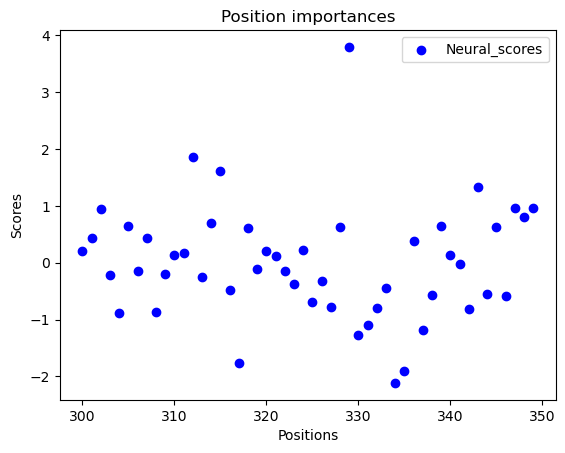

Got to iteration 3 in 36.651400089263916 seconds
Epoch [1/15], Training Loss: 0.3370
Epoch [1/15], Validation Loss: 0.2117
Epoch [1/15], Validation Accuracy: 93.5935%
Epoch [2/15], Training Loss: 0.1591
Epoch [2/15], Validation Loss: 0.1508
Epoch [2/15], Validation Accuracy: 95.5633%
Epoch [3/15], Training Loss: 0.1587
Epoch [3/15], Validation Loss: 0.1199
Epoch [3/15], Validation Accuracy: 96.6679%
Epoch [4/15], Training Loss: 0.1946
Epoch [4/15], Validation Loss: 0.1164
Epoch [4/15], Validation Accuracy: 96.9624%
Epoch [5/15], Training Loss: 0.1942
Epoch [5/15], Validation Loss: 0.1140
Epoch [5/15], Validation Accuracy: 97.0361%
Epoch [6/15], Training Loss: 0.0836
Epoch [6/15], Validation Loss: 0.1202
Epoch [6/15], Validation Accuracy: 96.9993%
Epoch [7/15], Training Loss: 0.0627
Epoch [7/15], Validation Loss: 0.1129
Epoch [7/15], Validation Accuracy: 97.1834%
Epoch [8/15], Training Loss: 0.1090
Epoch [8/15], Validation Loss: 0.1091
Epoch [8/15], Validation Accuracy: 97.1649%
Epoch [

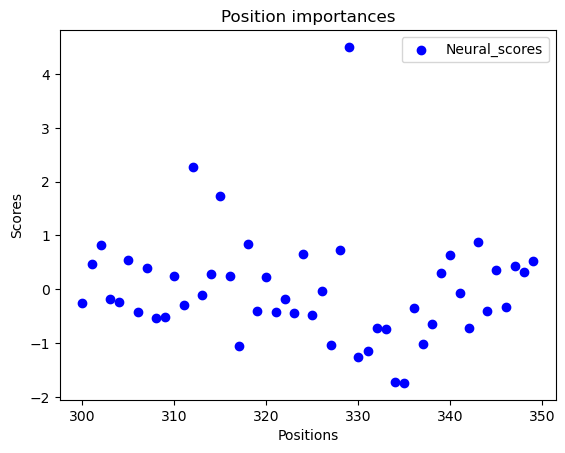

Got to iteration 4 in 49.8664128780365 seconds
Epoch [1/15], Training Loss: 0.2423
Epoch [1/15], Validation Loss: 0.2242
Epoch [1/15], Validation Accuracy: 92.5994%
Epoch [2/15], Training Loss: 0.2177
Epoch [2/15], Validation Loss: 0.1508
Epoch [2/15], Validation Accuracy: 95.2872%
Epoch [3/15], Training Loss: 0.1643
Epoch [3/15], Validation Loss: 0.1258
Epoch [3/15], Validation Accuracy: 96.2261%
Epoch [4/15], Training Loss: 0.0794
Epoch [4/15], Validation Loss: 0.1313
Epoch [4/15], Validation Accuracy: 96.1708%
Epoch [5/15], Training Loss: 0.0739
Epoch [5/15], Validation Loss: 0.1210
Epoch [5/15], Validation Accuracy: 96.4470%
Epoch [6/15], Training Loss: 0.1161
Epoch [6/15], Validation Loss: 0.1111
Epoch [6/15], Validation Accuracy: 96.6863%
Epoch [7/15], Training Loss: 0.0747
Epoch [7/15], Validation Loss: 0.1217
Epoch [7/15], Validation Accuracy: 96.4654%
Epoch [8/15], Training Loss: 0.1009
Epoch [8/15], Validation Loss: 0.1085
Epoch [8/15], Validation Accuracy: 96.7784%
Epoch [9/

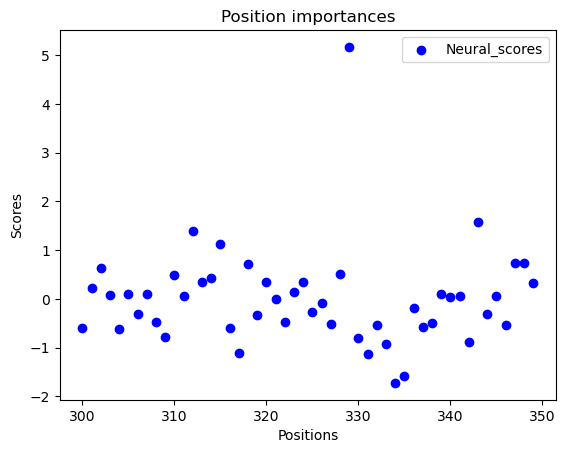

Got to iteration 5 in 62.367085218429565 seconds
Epoch [1/15], Training Loss: 0.2545
Epoch [1/15], Validation Loss: 0.2020
Epoch [1/15], Validation Accuracy: 93.9249%
Epoch [2/15], Training Loss: 0.1818
Epoch [2/15], Validation Loss: 0.1222
Epoch [2/15], Validation Accuracy: 96.4102%
Epoch [3/15], Training Loss: 0.1160
Epoch [3/15], Validation Loss: 0.1076
Epoch [3/15], Validation Accuracy: 96.8152%
Epoch [4/15], Training Loss: 0.0998
Epoch [4/15], Validation Loss: 0.1019
Epoch [4/15], Validation Accuracy: 96.9440%
Epoch [5/15], Training Loss: 0.1333
Epoch [5/15], Validation Loss: 0.1003
Epoch [5/15], Validation Accuracy: 97.1097%
Epoch [6/15], Training Loss: 0.0393
Epoch [6/15], Validation Loss: 0.1041
Epoch [6/15], Validation Accuracy: 96.9256%
Epoch [7/15], Training Loss: 0.0792
Epoch [7/15], Validation Loss: 0.0948
Epoch [7/15], Validation Accuracy: 97.1465%
Epoch [8/15], Training Loss: 0.1658
Epoch [8/15], Validation Loss: 0.0985
Epoch [8/15], Validation Accuracy: 97.2386%
Epoch [

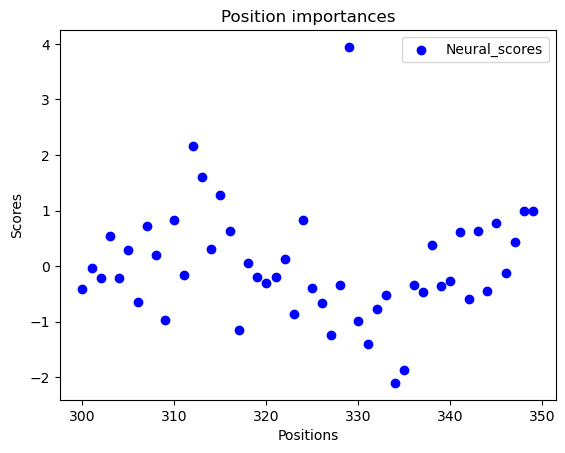

Got to iteration 6 in 74.77335214614868 seconds
Epoch [1/15], Training Loss: 0.3009
Epoch [1/15], Validation Loss: 0.2565
Epoch [1/15], Validation Accuracy: 91.8814%
Epoch [2/15], Training Loss: 0.1552
Epoch [2/15], Validation Loss: 0.1608
Epoch [2/15], Validation Accuracy: 95.5081%
Epoch [3/15], Training Loss: 0.0999
Epoch [3/15], Validation Loss: 0.1292
Epoch [3/15], Validation Accuracy: 96.4838%
Epoch [4/15], Training Loss: 0.0840
Epoch [4/15], Validation Loss: 0.1218
Epoch [4/15], Validation Accuracy: 96.8520%
Epoch [5/15], Training Loss: 0.1858
Epoch [5/15], Validation Loss: 0.1234
Epoch [5/15], Validation Accuracy: 96.6311%
Epoch [6/15], Training Loss: 0.1868
Epoch [6/15], Validation Loss: 0.1285
Epoch [6/15], Validation Accuracy: 96.5022%
Epoch [7/15], Training Loss: 0.1192
Epoch [7/15], Validation Loss: 0.1167
Epoch [7/15], Validation Accuracy: 97.0913%
Epoch [8/15], Training Loss: 0.1325
Epoch [8/15], Validation Loss: 0.1181
Epoch [8/15], Validation Accuracy: 96.8336%
Epoch [9

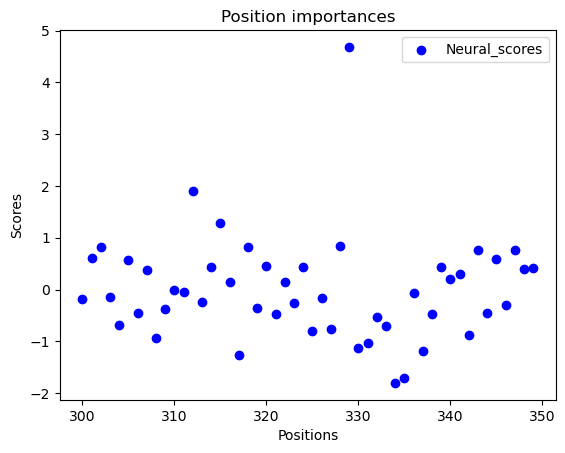

Got to iteration 7 in 87.17594981193542 seconds
Epoch [1/15], Training Loss: 0.2183
Epoch [1/15], Validation Loss: 0.2117
Epoch [1/15], Validation Accuracy: 93.3910%
Epoch [2/15], Training Loss: 0.1453
Epoch [2/15], Validation Loss: 0.1268
Epoch [2/15], Validation Accuracy: 96.5943%
Epoch [3/15], Training Loss: 0.1495
Epoch [3/15], Validation Loss: 0.1063
Epoch [3/15], Validation Accuracy: 97.4043%
Epoch [4/15], Training Loss: 0.1183
Epoch [4/15], Validation Loss: 0.1020
Epoch [4/15], Validation Accuracy: 97.5884%
Epoch [5/15], Training Loss: 0.1592
Epoch [5/15], Validation Loss: 0.1063
Epoch [5/15], Validation Accuracy: 97.4043%
Epoch [6/15], Training Loss: 0.0373
Epoch [6/15], Validation Loss: 0.0999
Epoch [6/15], Validation Accuracy: 97.6804%
Epoch [7/15], Training Loss: 0.1128
Epoch [7/15], Validation Loss: 0.0941
Epoch [7/15], Validation Accuracy: 97.6988%
Epoch [8/15], Training Loss: 0.0726
Epoch [8/15], Validation Loss: 0.1033
Epoch [8/15], Validation Accuracy: 97.2938%
Epoch [9

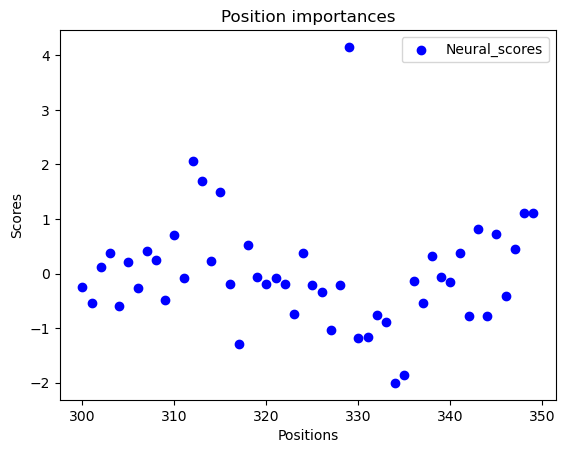

Got to iteration 8 in 99.41648697853088 seconds
Epoch [1/15], Training Loss: 0.2437
Epoch [1/15], Validation Loss: 0.2146
Epoch [1/15], Validation Accuracy: 92.9860%
Epoch [2/15], Training Loss: 0.1494
Epoch [2/15], Validation Loss: 0.1443
Epoch [2/15], Validation Accuracy: 95.7474%
Epoch [3/15], Training Loss: 0.1968
Epoch [3/15], Validation Loss: 0.1202
Epoch [3/15], Validation Accuracy: 96.5206%
Epoch [4/15], Training Loss: 0.0835
Epoch [4/15], Validation Loss: 0.1082
Epoch [4/15], Validation Accuracy: 96.9624%
Epoch [5/15], Training Loss: 0.0704
Epoch [5/15], Validation Loss: 0.1052
Epoch [5/15], Validation Accuracy: 96.9993%
Epoch [6/15], Training Loss: 0.1143
Epoch [6/15], Validation Loss: 0.1017
Epoch [6/15], Validation Accuracy: 97.1465%
Epoch [7/15], Training Loss: 0.1193
Epoch [7/15], Validation Loss: 0.1026
Epoch [7/15], Validation Accuracy: 97.2570%
Epoch [8/15], Training Loss: 0.1052
Epoch [8/15], Validation Loss: 0.1052
Epoch [8/15], Validation Accuracy: 97.0913%
Epoch [9

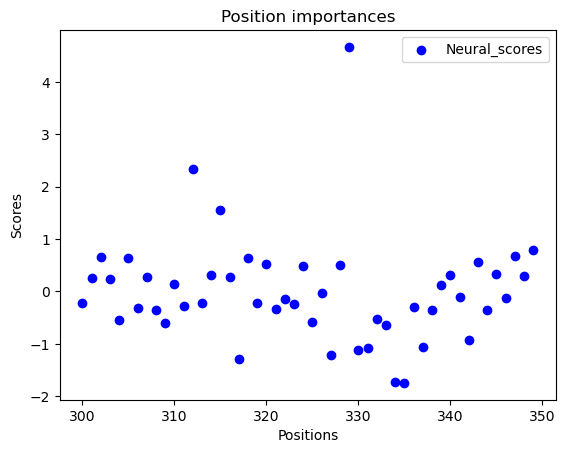

Got to iteration 9 in 111.70966625213623 seconds
Epoch [1/15], Training Loss: 0.2192
Epoch [1/15], Validation Loss: 0.2149
Epoch [1/15], Validation Accuracy: 92.8387%
Epoch [2/15], Training Loss: 0.0718
Epoch [2/15], Validation Loss: 0.1332
Epoch [2/15], Validation Accuracy: 96.3365%
Epoch [3/15], Training Loss: 0.0778
Epoch [3/15], Validation Loss: 0.1184
Epoch [3/15], Validation Accuracy: 96.8888%
Epoch [4/15], Training Loss: 0.1593
Epoch [4/15], Validation Loss: 0.1324
Epoch [4/15], Validation Accuracy: 96.1892%
Epoch [5/15], Training Loss: 0.0999
Epoch [5/15], Validation Loss: 0.1138
Epoch [5/15], Validation Accuracy: 96.9440%
Epoch [6/15], Training Loss: 0.1308
Epoch [6/15], Validation Loss: 0.1133
Epoch [6/15], Validation Accuracy: 97.0545%
Epoch [7/15], Training Loss: 0.0735
Epoch [7/15], Validation Loss: 0.1291
Epoch [7/15], Validation Accuracy: 96.1708%
Epoch [8/15], Training Loss: 0.0686
Epoch [8/15], Validation Loss: 0.1064
Epoch [8/15], Validation Accuracy: 97.2386%
Epoch [

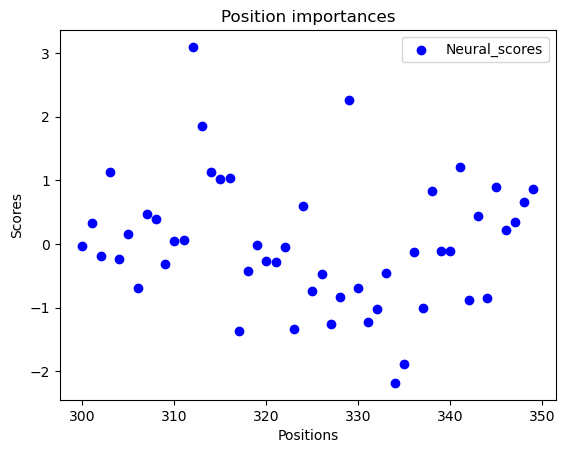

Got to iteration 10 in 124.38107347488403 seconds
Epoch [1/15], Training Loss: 0.2450
Epoch [1/15], Validation Loss: 0.2241
Epoch [1/15], Validation Accuracy: 92.1576%
Epoch [2/15], Training Loss: 0.1954
Epoch [2/15], Validation Loss: 0.1280
Epoch [2/15], Validation Accuracy: 96.4286%
Epoch [3/15], Training Loss: 0.2326
Epoch [3/15], Validation Loss: 0.1106
Epoch [3/15], Validation Accuracy: 96.7784%
Epoch [4/15], Training Loss: 0.1295
Epoch [4/15], Validation Loss: 0.1106
Epoch [4/15], Validation Accuracy: 96.7784%
Epoch [5/15], Training Loss: 0.0608
Epoch [5/15], Validation Loss: 0.1060
Epoch [5/15], Validation Accuracy: 96.9256%
Epoch [6/15], Training Loss: 0.0962
Epoch [6/15], Validation Loss: 0.1012
Epoch [6/15], Validation Accuracy: 97.1097%
Epoch [7/15], Training Loss: 0.1058
Epoch [7/15], Validation Loss: 0.0987
Epoch [7/15], Validation Accuracy: 97.2202%
Epoch [8/15], Training Loss: 0.0741
Epoch [8/15], Validation Loss: 0.0949
Epoch [8/15], Validation Accuracy: 97.3306%
Epoch 

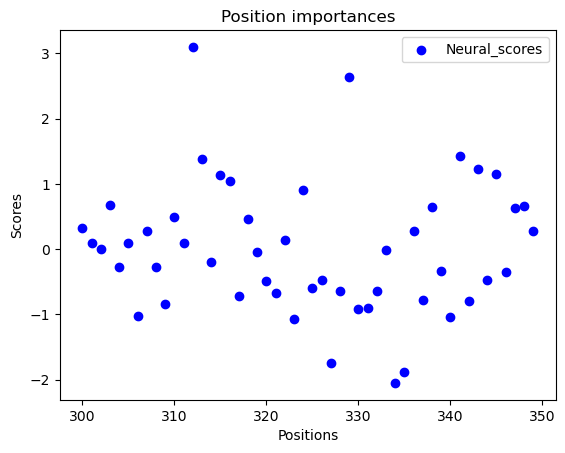

Got to iteration 11 in 136.69605946540833 seconds
Epoch [1/15], Training Loss: 0.2390
Epoch [1/15], Validation Loss: 0.2234
Epoch [1/15], Validation Accuracy: 93.3726%
Epoch [2/15], Training Loss: 0.1650
Epoch [2/15], Validation Loss: 0.1460
Epoch [2/15], Validation Accuracy: 95.9131%
Epoch [3/15], Training Loss: 0.0918
Epoch [3/15], Validation Loss: 0.1299
Epoch [3/15], Validation Accuracy: 96.4838%
Epoch [4/15], Training Loss: 0.1002
Epoch [4/15], Validation Loss: 0.1219
Epoch [4/15], Validation Accuracy: 96.7784%
Epoch [5/15], Training Loss: 0.1254
Epoch [5/15], Validation Loss: 0.1223
Epoch [5/15], Validation Accuracy: 96.7047%
Epoch [6/15], Training Loss: 0.0727
Epoch [6/15], Validation Loss: 0.1243
Epoch [6/15], Validation Accuracy: 97.0545%
Epoch [7/15], Training Loss: 0.1003
Epoch [7/15], Validation Loss: 0.1139
Epoch [7/15], Validation Accuracy: 97.2386%
Epoch [8/15], Training Loss: 0.0876
Epoch [8/15], Validation Loss: 0.1150
Epoch [8/15], Validation Accuracy: 97.2386%
Epoch 

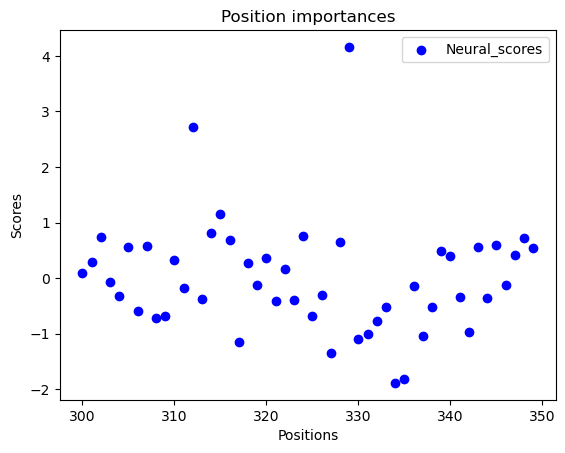

Got to iteration 12 in 149.17912650108337 seconds
Epoch [1/15], Training Loss: 0.3376
Epoch [1/15], Validation Loss: 0.2335
Epoch [1/15], Validation Accuracy: 92.0839%
Epoch [2/15], Training Loss: 0.2237
Epoch [2/15], Validation Loss: 0.1364
Epoch [2/15], Validation Accuracy: 95.8395%
Epoch [3/15], Training Loss: 0.1080
Epoch [3/15], Validation Loss: 0.1226
Epoch [3/15], Validation Accuracy: 96.6863%
Epoch [4/15], Training Loss: 0.1646
Epoch [4/15], Validation Loss: 0.1098
Epoch [4/15], Validation Accuracy: 97.0729%
Epoch [5/15], Training Loss: 0.1420
Epoch [5/15], Validation Loss: 0.1143
Epoch [5/15], Validation Accuracy: 96.7231%
Epoch [6/15], Training Loss: 0.1475
Epoch [6/15], Validation Loss: 0.1040
Epoch [6/15], Validation Accuracy: 97.0913%
Epoch [7/15], Training Loss: 0.1292
Epoch [7/15], Validation Loss: 0.1014
Epoch [7/15], Validation Accuracy: 97.2386%
Epoch [8/15], Training Loss: 0.0888
Epoch [8/15], Validation Loss: 0.1057
Epoch [8/15], Validation Accuracy: 97.0913%
Epoch 

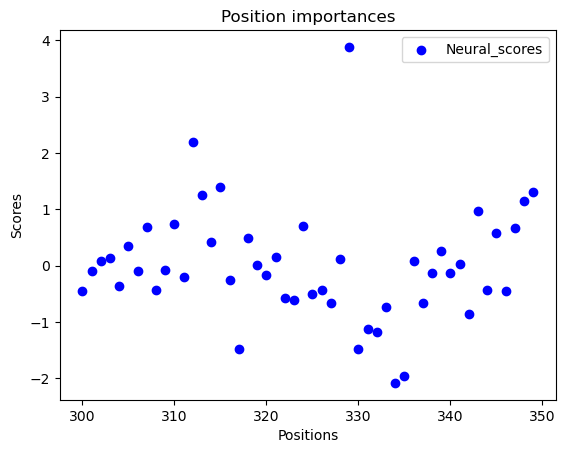

Got to iteration 13 in 161.59927558898926 seconds
Epoch [1/15], Training Loss: 0.2077
Epoch [1/15], Validation Loss: 0.2022
Epoch [1/15], Validation Accuracy: 93.0965%
Epoch [2/15], Training Loss: 0.1755
Epoch [2/15], Validation Loss: 0.1395
Epoch [2/15], Validation Accuracy: 95.6370%
Epoch [3/15], Training Loss: 0.1655
Epoch [3/15], Validation Loss: 0.1156
Epoch [3/15], Validation Accuracy: 96.6495%
Epoch [4/15], Training Loss: 0.1839
Epoch [4/15], Validation Loss: 0.1150
Epoch [4/15], Validation Accuracy: 96.5390%
Epoch [5/15], Training Loss: 0.0721
Epoch [5/15], Validation Loss: 0.1123
Epoch [5/15], Validation Accuracy: 96.7231%
Epoch [6/15], Training Loss: 0.1122
Epoch [6/15], Validation Loss: 0.1146
Epoch [6/15], Validation Accuracy: 96.5022%
Epoch [7/15], Training Loss: 0.0624
Epoch [7/15], Validation Loss: 0.1016
Epoch [7/15], Validation Accuracy: 97.0545%
Epoch [8/15], Training Loss: 0.1091
Epoch [8/15], Validation Loss: 0.1043
Epoch [8/15], Validation Accuracy: 97.0545%
Epoch 

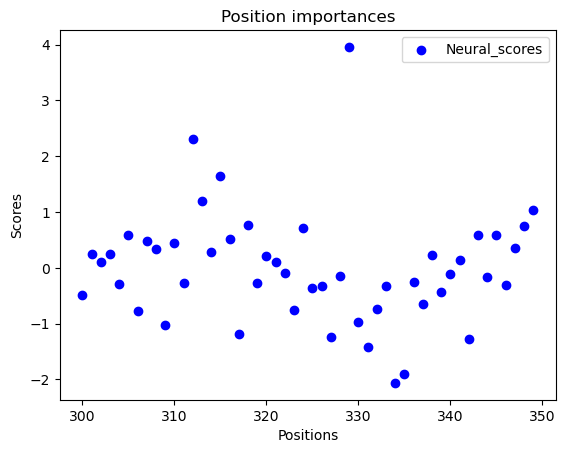

Got to iteration 14 in 173.9698965549469 seconds
Epoch [1/15], Training Loss: 0.1853
Epoch [1/15], Validation Loss: 0.2233
Epoch [1/15], Validation Accuracy: 92.6730%
Epoch [2/15], Training Loss: 0.2460
Epoch [2/15], Validation Loss: 0.1400
Epoch [2/15], Validation Accuracy: 96.1892%
Epoch [3/15], Training Loss: 0.0851
Epoch [3/15], Validation Loss: 0.1199
Epoch [3/15], Validation Accuracy: 96.7047%
Epoch [4/15], Training Loss: 0.1199
Epoch [4/15], Validation Loss: 0.1098
Epoch [4/15], Validation Accuracy: 96.9624%
Epoch [5/15], Training Loss: 0.1364
Epoch [5/15], Validation Loss: 0.1194
Epoch [5/15], Validation Accuracy: 96.7231%
Epoch [6/15], Training Loss: 0.1301
Epoch [6/15], Validation Loss: 0.1164
Epoch [6/15], Validation Accuracy: 96.8520%
Epoch [7/15], Training Loss: 0.0755
Epoch [7/15], Validation Loss: 0.1058
Epoch [7/15], Validation Accuracy: 97.1465%
Epoch [8/15], Training Loss: 0.0900
Epoch [8/15], Validation Loss: 0.1153
Epoch [8/15], Validation Accuracy: 96.9440%
Epoch [

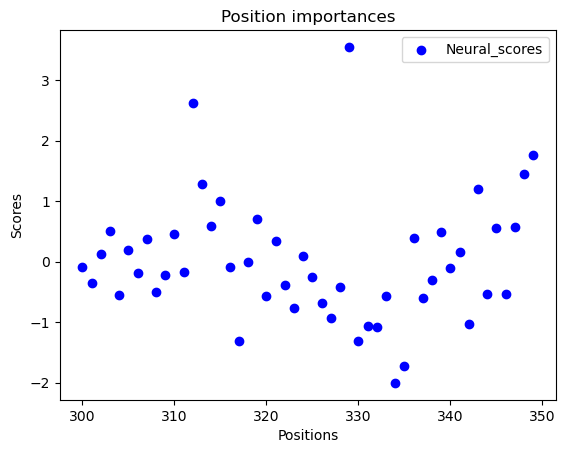

Got to iteration 15 in 186.5236532688141 seconds
Epoch [1/15], Training Loss: 0.2953
Epoch [1/15], Validation Loss: 0.2396
Epoch [1/15], Validation Accuracy: 91.9735%
Epoch [2/15], Training Loss: 0.1563
Epoch [2/15], Validation Loss: 0.1428
Epoch [2/15], Validation Accuracy: 96.2077%
Epoch [3/15], Training Loss: 0.1121
Epoch [3/15], Validation Loss: 0.1306
Epoch [3/15], Validation Accuracy: 96.3365%
Epoch [4/15], Training Loss: 0.0701
Epoch [4/15], Validation Loss: 0.1201
Epoch [4/15], Validation Accuracy: 96.7047%
Epoch [5/15], Training Loss: 0.1839
Epoch [5/15], Validation Loss: 0.1359
Epoch [5/15], Validation Accuracy: 96.2445%
Epoch [6/15], Training Loss: 0.1211
Epoch [6/15], Validation Loss: 0.1207
Epoch [6/15], Validation Accuracy: 96.7968%
Epoch [7/15], Training Loss: 0.1190
Epoch [7/15], Validation Loss: 0.1190
Epoch [7/15], Validation Accuracy: 96.8336%
Epoch [8/15], Training Loss: 0.0817
Epoch [8/15], Validation Loss: 0.1128
Epoch [8/15], Validation Accuracy: 96.9256%
Epoch [

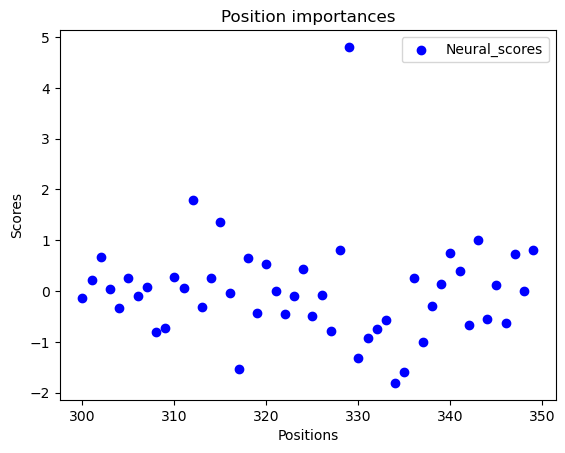

Got to iteration 16 in 198.75520205497742 seconds
Epoch [1/15], Training Loss: 0.2292
Epoch [1/15], Validation Loss: 0.2062
Epoch [1/15], Validation Accuracy: 93.5383%
Epoch [2/15], Training Loss: 0.1185
Epoch [2/15], Validation Loss: 0.1327
Epoch [2/15], Validation Accuracy: 96.0420%
Epoch [3/15], Training Loss: 0.1685
Epoch [3/15], Validation Loss: 0.1234
Epoch [3/15], Validation Accuracy: 96.6127%
Epoch [4/15], Training Loss: 0.1145
Epoch [4/15], Validation Loss: 0.1144
Epoch [4/15], Validation Accuracy: 96.7231%
Epoch [5/15], Training Loss: 0.1403
Epoch [5/15], Validation Loss: 0.1196
Epoch [5/15], Validation Accuracy: 96.6495%
Epoch [6/15], Training Loss: 0.1002
Epoch [6/15], Validation Loss: 0.1150
Epoch [6/15], Validation Accuracy: 96.8704%
Epoch [7/15], Training Loss: 0.1115
Epoch [7/15], Validation Loss: 0.1109
Epoch [7/15], Validation Accuracy: 96.9440%
Epoch [8/15], Training Loss: 0.0635
Epoch [8/15], Validation Loss: 0.1081
Epoch [8/15], Validation Accuracy: 97.0361%
Epoch 

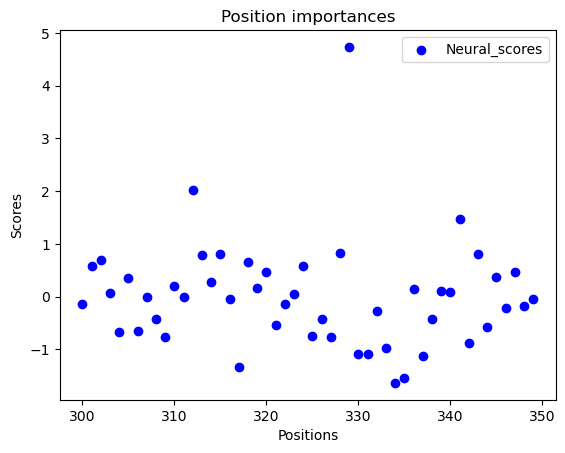

Got to iteration 17 in 211.35035133361816 seconds
Epoch [1/15], Training Loss: 0.2265
Epoch [1/15], Validation Loss: 0.2330
Epoch [1/15], Validation Accuracy: 92.3049%
Epoch [2/15], Training Loss: 0.1324
Epoch [2/15], Validation Loss: 0.1420
Epoch [2/15], Validation Accuracy: 95.8027%
Epoch [3/15], Training Loss: 0.1029
Epoch [3/15], Validation Loss: 0.1280
Epoch [3/15], Validation Accuracy: 96.3733%
Epoch [4/15], Training Loss: 0.0601
Epoch [4/15], Validation Loss: 0.1259
Epoch [4/15], Validation Accuracy: 96.5206%
Epoch [5/15], Training Loss: 0.0905
Epoch [5/15], Validation Loss: 0.1246
Epoch [5/15], Validation Accuracy: 96.5022%
Epoch [6/15], Training Loss: 0.1135
Epoch [6/15], Validation Loss: 0.1201
Epoch [6/15], Validation Accuracy: 96.4654%
Epoch [7/15], Training Loss: 0.1477
Epoch [7/15], Validation Loss: 0.1133
Epoch [7/15], Validation Accuracy: 96.8152%
Epoch [8/15], Training Loss: 0.1266
Epoch [8/15], Validation Loss: 0.1118
Epoch [8/15], Validation Accuracy: 96.8336%
Epoch 

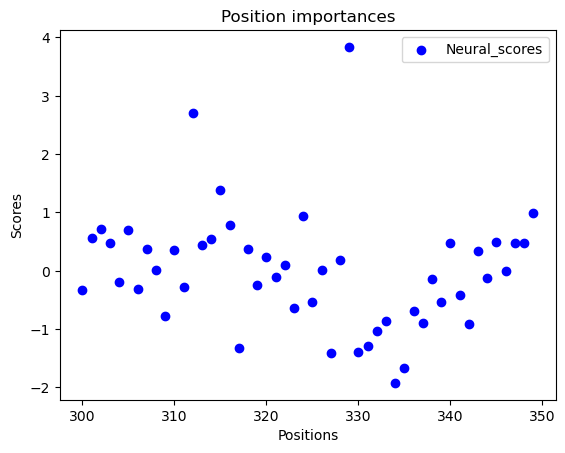

Got to iteration 18 in 223.50635170936584 seconds
Epoch [1/15], Training Loss: 0.1899
Epoch [1/15], Validation Loss: 0.2105
Epoch [1/15], Validation Accuracy: 92.6730%
Epoch [2/15], Training Loss: 0.1311
Epoch [2/15], Validation Loss: 0.1398
Epoch [2/15], Validation Accuracy: 95.8763%
Epoch [3/15], Training Loss: 0.1812
Epoch [3/15], Validation Loss: 0.1300
Epoch [3/15], Validation Accuracy: 96.0788%
Epoch [4/15], Training Loss: 0.1239
Epoch [4/15], Validation Loss: 0.1252
Epoch [4/15], Validation Accuracy: 96.2997%
Epoch [5/15], Training Loss: 0.1616
Epoch [5/15], Validation Loss: 0.1122
Epoch [5/15], Validation Accuracy: 96.8336%
Epoch [6/15], Training Loss: 0.1432
Epoch [6/15], Validation Loss: 0.1188
Epoch [6/15], Validation Accuracy: 96.8888%
Epoch [7/15], Training Loss: 0.1350
Epoch [7/15], Validation Loss: 0.1106
Epoch [7/15], Validation Accuracy: 96.7415%
Epoch [8/15], Training Loss: 0.1171
Epoch [8/15], Validation Loss: 0.1121
Epoch [8/15], Validation Accuracy: 96.9440%
Epoch 

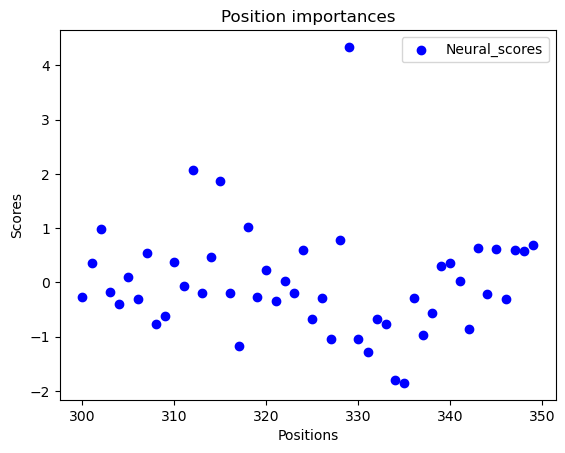

Got to iteration 19 in 235.9680950641632 seconds
Epoch [1/15], Training Loss: 0.1942
Epoch [1/15], Validation Loss: 0.2113
Epoch [1/15], Validation Accuracy: 93.5199%
Epoch [2/15], Training Loss: 0.1801
Epoch [2/15], Validation Loss: 0.1433
Epoch [2/15], Validation Accuracy: 96.0052%
Epoch [3/15], Training Loss: 0.0643
Epoch [3/15], Validation Loss: 0.1201
Epoch [3/15], Validation Accuracy: 96.7047%
Epoch [4/15], Training Loss: 0.0817
Epoch [4/15], Validation Loss: 0.1150
Epoch [4/15], Validation Accuracy: 96.9993%
Epoch [5/15], Training Loss: 0.0690
Epoch [5/15], Validation Loss: 0.1220
Epoch [5/15], Validation Accuracy: 96.7968%
Epoch [6/15], Training Loss: 0.0935
Epoch [6/15], Validation Loss: 0.1077
Epoch [6/15], Validation Accuracy: 97.3122%
Epoch [7/15], Training Loss: 0.1478
Epoch [7/15], Validation Loss: 0.1099
Epoch [7/15], Validation Accuracy: 97.1097%
Epoch [8/15], Training Loss: 0.0549
Epoch [8/15], Validation Loss: 0.1126
Epoch [8/15], Validation Accuracy: 97.2202%
Epoch [

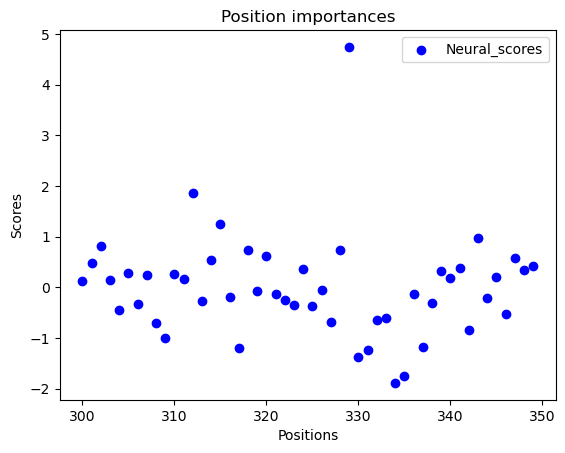

Got to iteration 20 in 248.33521056175232 seconds
Epoch [1/15], Training Loss: 0.2666
Epoch [1/15], Validation Loss: 0.2382
Epoch [1/15], Validation Accuracy: 92.8940%
Epoch [2/15], Training Loss: 0.1196
Epoch [2/15], Validation Loss: 0.1492
Epoch [2/15], Validation Accuracy: 95.8027%
Epoch [3/15], Training Loss: 0.1712
Epoch [3/15], Validation Loss: 0.1325
Epoch [3/15], Validation Accuracy: 96.5206%
Epoch [4/15], Training Loss: 0.1874
Epoch [4/15], Validation Loss: 0.1265
Epoch [4/15], Validation Accuracy: 96.6679%
Epoch [5/15], Training Loss: 0.0827
Epoch [5/15], Validation Loss: 0.1219
Epoch [5/15], Validation Accuracy: 96.7968%
Epoch [6/15], Training Loss: 0.0872
Epoch [6/15], Validation Loss: 0.1205
Epoch [6/15], Validation Accuracy: 96.8152%
Epoch [7/15], Training Loss: 0.1345
Epoch [7/15], Validation Loss: 0.1249
Epoch [7/15], Validation Accuracy: 96.5390%
Epoch [8/15], Training Loss: 0.1110
Epoch [8/15], Validation Loss: 0.1206
Epoch [8/15], Validation Accuracy: 96.8152%
Epoch 

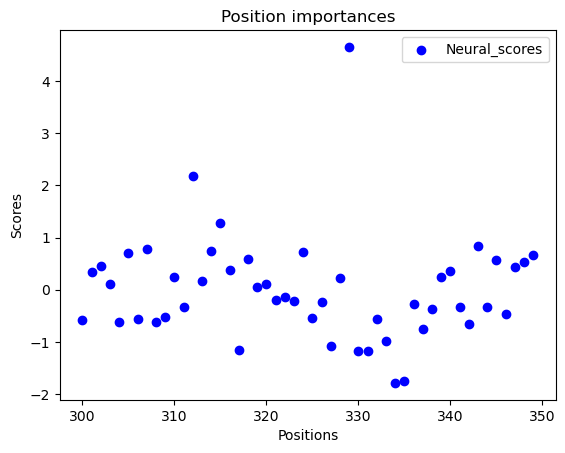

Got to iteration 21 in 260.71842885017395 seconds
Epoch [1/15], Training Loss: 0.2814
Epoch [1/15], Validation Loss: 0.2467
Epoch [1/15], Validation Accuracy: 91.1451%
Epoch [2/15], Training Loss: 0.1845
Epoch [2/15], Validation Loss: 0.1460
Epoch [2/15], Validation Accuracy: 95.8211%
Epoch [3/15], Training Loss: 0.1083
Epoch [3/15], Validation Loss: 0.1332
Epoch [3/15], Validation Accuracy: 96.3549%
Epoch [4/15], Training Loss: 0.1062
Epoch [4/15], Validation Loss: 0.1274
Epoch [4/15], Validation Accuracy: 96.5943%
Epoch [5/15], Training Loss: 0.1881
Epoch [5/15], Validation Loss: 0.1220
Epoch [5/15], Validation Accuracy: 96.5943%
Epoch [6/15], Training Loss: 0.0754
Epoch [6/15], Validation Loss: 0.1403
Epoch [6/15], Validation Accuracy: 95.9499%
Epoch [7/15], Training Loss: 0.0787
Epoch [7/15], Validation Loss: 0.1174
Epoch [7/15], Validation Accuracy: 96.8704%
Epoch [8/15], Training Loss: 0.0431
Epoch [8/15], Validation Loss: 0.1177
Epoch [8/15], Validation Accuracy: 96.9440%
Epoch 

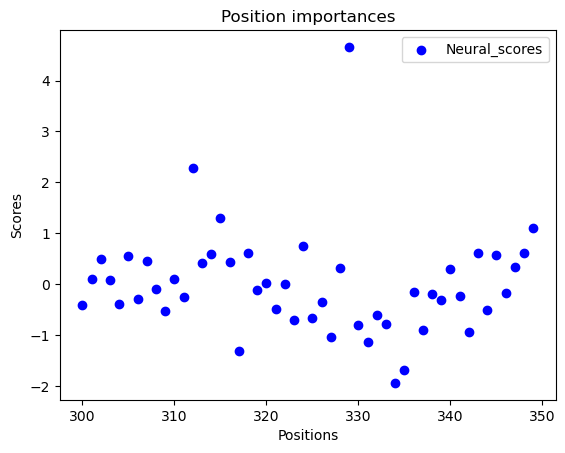

Got to iteration 22 in 273.4924621582031 seconds
Epoch [1/15], Training Loss: 0.2078
Epoch [1/15], Validation Loss: 0.2422
Epoch [1/15], Validation Accuracy: 91.8999%
Epoch [2/15], Training Loss: 0.1163
Epoch [2/15], Validation Loss: 0.1331
Epoch [2/15], Validation Accuracy: 96.2629%
Epoch [3/15], Training Loss: 0.1408
Epoch [3/15], Validation Loss: 0.1162
Epoch [3/15], Validation Accuracy: 96.8704%
Epoch [4/15], Training Loss: 0.0764
Epoch [4/15], Validation Loss: 0.1153
Epoch [4/15], Validation Accuracy: 96.6679%
Epoch [5/15], Training Loss: 0.1029
Epoch [5/15], Validation Loss: 0.1119
Epoch [5/15], Validation Accuracy: 96.7968%
Epoch [6/15], Training Loss: 0.0704
Epoch [6/15], Validation Loss: 0.1124
Epoch [6/15], Validation Accuracy: 96.7784%
Epoch [7/15], Training Loss: 0.1172
Epoch [7/15], Validation Loss: 0.1061
Epoch [7/15], Validation Accuracy: 97.0913%
Epoch [8/15], Training Loss: 0.0562
Epoch [8/15], Validation Loss: 0.1032
Epoch [8/15], Validation Accuracy: 97.1649%
Epoch [

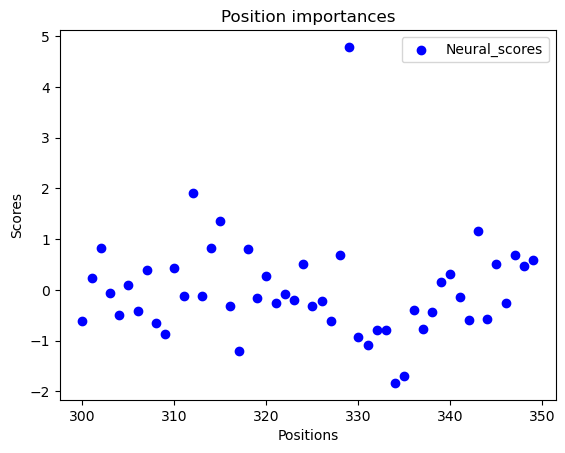

Got to iteration 23 in 285.7911915779114 seconds
Epoch [1/15], Training Loss: 0.1510
Epoch [1/15], Validation Loss: 0.1976
Epoch [1/15], Validation Accuracy: 93.0965%
Epoch [2/15], Training Loss: 0.1535
Epoch [2/15], Validation Loss: 0.1361
Epoch [2/15], Validation Accuracy: 95.7474%
Epoch [3/15], Training Loss: 0.1446
Epoch [3/15], Validation Loss: 0.1123
Epoch [3/15], Validation Accuracy: 96.6127%
Epoch [4/15], Training Loss: 0.1008
Epoch [4/15], Validation Loss: 0.1115
Epoch [4/15], Validation Accuracy: 96.6679%
Epoch [5/15], Training Loss: 0.0766
Epoch [5/15], Validation Loss: 0.1068
Epoch [5/15], Validation Accuracy: 96.8520%
Epoch [6/15], Training Loss: 0.0634
Epoch [6/15], Validation Loss: 0.1051
Epoch [6/15], Validation Accuracy: 96.8520%
Epoch [7/15], Training Loss: 0.1430
Epoch [7/15], Validation Loss: 0.1108
Epoch [7/15], Validation Accuracy: 96.8336%
Epoch [8/15], Training Loss: 0.0988
Epoch [8/15], Validation Loss: 0.1016
Epoch [8/15], Validation Accuracy: 97.1281%
Epoch [

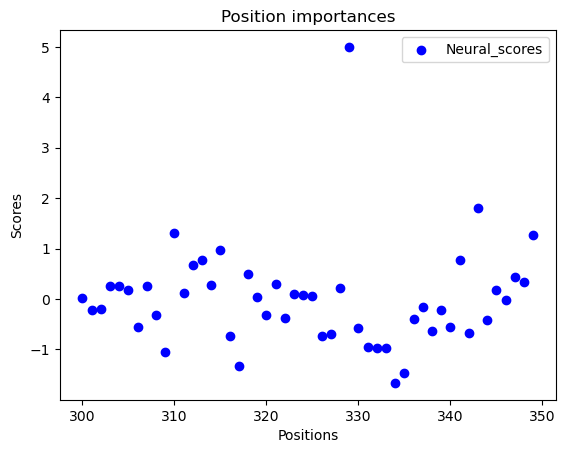

Got to iteration 24 in 299.1299035549164 seconds
Epoch [1/15], Training Loss: 0.2080
Epoch [1/15], Validation Loss: 0.2281
Epoch [1/15], Validation Accuracy: 92.4705%
Epoch [2/15], Training Loss: 0.1158
Epoch [2/15], Validation Loss: 0.1444
Epoch [2/15], Validation Accuracy: 95.4345%
Epoch [3/15], Training Loss: 0.0924
Epoch [3/15], Validation Loss: 0.1190
Epoch [3/15], Validation Accuracy: 96.4102%
Epoch [4/15], Training Loss: 0.1288
Epoch [4/15], Validation Loss: 0.1169
Epoch [4/15], Validation Accuracy: 96.5390%
Epoch [5/15], Training Loss: 0.0937
Epoch [5/15], Validation Loss: 0.1057
Epoch [5/15], Validation Accuracy: 97.0545%
Epoch [6/15], Training Loss: 0.1324
Epoch [6/15], Validation Loss: 0.1047
Epoch [6/15], Validation Accuracy: 97.0729%
Epoch [7/15], Training Loss: 0.1111
Epoch [7/15], Validation Loss: 0.1116
Epoch [7/15], Validation Accuracy: 96.5390%
Epoch [8/15], Training Loss: 0.0708
Epoch [8/15], Validation Loss: 0.0991
Epoch [8/15], Validation Accuracy: 97.2754%
Epoch [

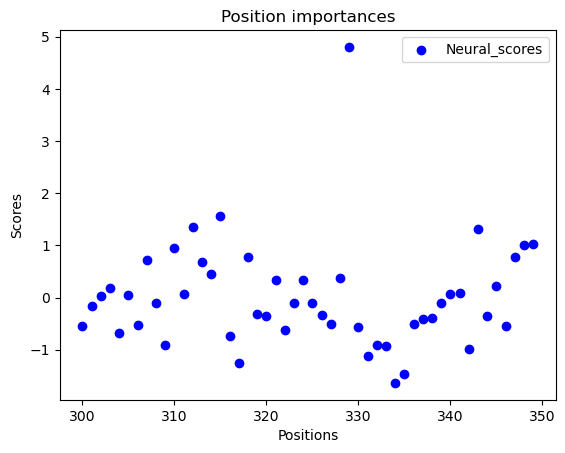

Got to iteration 25 in 312.41616201400757 seconds
Epoch [1/15], Training Loss: 0.2377
Epoch [1/15], Validation Loss: 0.2252
Epoch [1/15], Validation Accuracy: 92.7099%
Epoch [2/15], Training Loss: 0.1267
Epoch [2/15], Validation Loss: 0.1358
Epoch [2/15], Validation Accuracy: 96.0788%
Epoch [3/15], Training Loss: 0.1566
Epoch [3/15], Validation Loss: 0.1271
Epoch [3/15], Validation Accuracy: 96.3549%
Epoch [4/15], Training Loss: 0.1646
Epoch [4/15], Validation Loss: 0.1276
Epoch [4/15], Validation Accuracy: 96.2997%
Epoch [5/15], Training Loss: 0.1614
Epoch [5/15], Validation Loss: 0.1131
Epoch [5/15], Validation Accuracy: 96.9809%
Epoch [6/15], Training Loss: 0.0591
Epoch [6/15], Validation Loss: 0.1118
Epoch [6/15], Validation Accuracy: 96.9072%
Epoch [7/15], Training Loss: 0.0778
Epoch [7/15], Validation Loss: 0.1104
Epoch [7/15], Validation Accuracy: 96.9624%
Epoch [8/15], Training Loss: 0.1486
Epoch [8/15], Validation Loss: 0.1058
Epoch [8/15], Validation Accuracy: 97.3306%
Epoch 

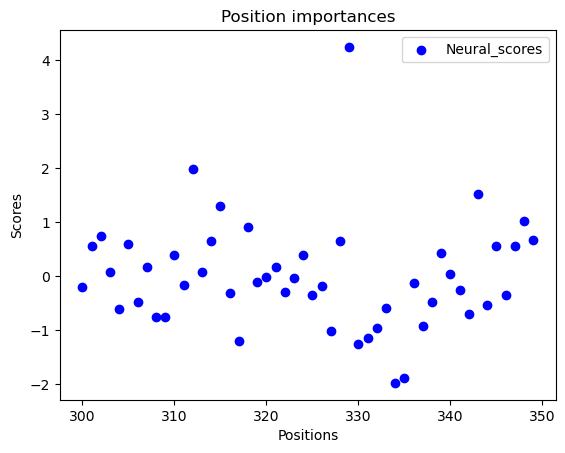

Got to iteration 26 in 325.122376203537 seconds
Epoch [1/15], Training Loss: 0.2655
Epoch [1/15], Validation Loss: 0.2050
Epoch [1/15], Validation Accuracy: 93.6672%
Epoch [2/15], Training Loss: 0.1693
Epoch [2/15], Validation Loss: 0.1450
Epoch [2/15], Validation Accuracy: 95.7474%
Epoch [3/15], Training Loss: 0.0746
Epoch [3/15], Validation Loss: 0.1201
Epoch [3/15], Validation Accuracy: 96.9256%
Epoch [4/15], Training Loss: 0.0771
Epoch [4/15], Validation Loss: 0.1100
Epoch [4/15], Validation Accuracy: 97.0729%
Epoch [5/15], Training Loss: 0.0689
Epoch [5/15], Validation Loss: 0.1064
Epoch [5/15], Validation Accuracy: 97.1465%
Epoch [6/15], Training Loss: 0.1010
Epoch [6/15], Validation Loss: 0.0999
Epoch [6/15], Validation Accuracy: 97.3859%
Epoch [7/15], Training Loss: 0.1517
Epoch [7/15], Validation Loss: 0.0972
Epoch [7/15], Validation Accuracy: 97.6068%
Epoch [8/15], Training Loss: 0.1266
Epoch [8/15], Validation Loss: 0.0975
Epoch [8/15], Validation Accuracy: 97.6068%
Epoch [9

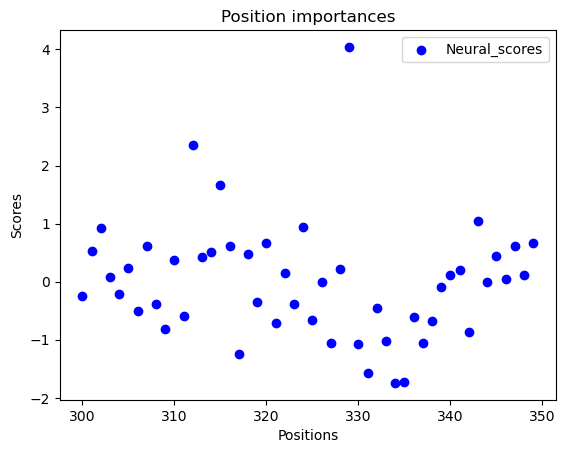

Got to iteration 27 in 337.42035937309265 seconds
Epoch [1/15], Training Loss: 0.4146
Epoch [1/15], Validation Loss: 0.2246
Epoch [1/15], Validation Accuracy: 93.7408%
Epoch [2/15], Training Loss: 0.1083
Epoch [2/15], Validation Loss: 0.1400
Epoch [2/15], Validation Accuracy: 96.0052%
Epoch [3/15], Training Loss: 0.2042
Epoch [3/15], Validation Loss: 0.1312
Epoch [3/15], Validation Accuracy: 96.1340%
Epoch [4/15], Training Loss: 0.0974
Epoch [4/15], Validation Loss: 0.1179
Epoch [4/15], Validation Accuracy: 96.6679%
Epoch [5/15], Training Loss: 0.1105
Epoch [5/15], Validation Loss: 0.1147
Epoch [5/15], Validation Accuracy: 96.7047%
Epoch [6/15], Training Loss: 0.1400
Epoch [6/15], Validation Loss: 0.1119
Epoch [6/15], Validation Accuracy: 96.8520%
Epoch [7/15], Training Loss: 0.0861
Epoch [7/15], Validation Loss: 0.1095
Epoch [7/15], Validation Accuracy: 97.0913%
Epoch [8/15], Training Loss: 0.0784
Epoch [8/15], Validation Loss: 0.1072
Epoch [8/15], Validation Accuracy: 97.1649%
Epoch 

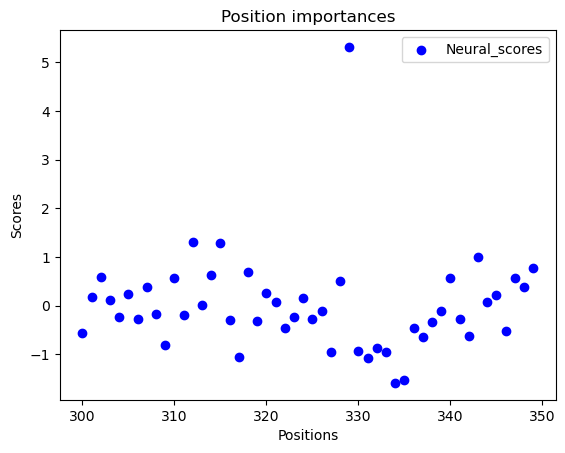

Got to iteration 28 in 350.9669625759125 seconds
Epoch [1/15], Training Loss: 0.3186
Epoch [1/15], Validation Loss: 0.2466
Epoch [1/15], Validation Accuracy: 91.5869%
Epoch [2/15], Training Loss: 0.2224
Epoch [2/15], Validation Loss: 0.1355
Epoch [2/15], Validation Accuracy: 95.9131%
Epoch [3/15], Training Loss: 0.1762
Epoch [3/15], Validation Loss: 0.1190
Epoch [3/15], Validation Accuracy: 96.2997%
Epoch [4/15], Training Loss: 0.1229
Epoch [4/15], Validation Loss: 0.1281
Epoch [4/15], Validation Accuracy: 95.9867%
Epoch [5/15], Training Loss: 0.1702
Epoch [5/15], Validation Loss: 0.1175
Epoch [5/15], Validation Accuracy: 96.5574%
Epoch [6/15], Training Loss: 0.1401
Epoch [6/15], Validation Loss: 0.1060
Epoch [6/15], Validation Accuracy: 97.0913%
Epoch [7/15], Training Loss: 0.1204
Epoch [7/15], Validation Loss: 0.1080
Epoch [7/15], Validation Accuracy: 96.9072%
Epoch [8/15], Training Loss: 0.0771
Epoch [8/15], Validation Loss: 0.1044
Epoch [8/15], Validation Accuracy: 97.0177%
Epoch [

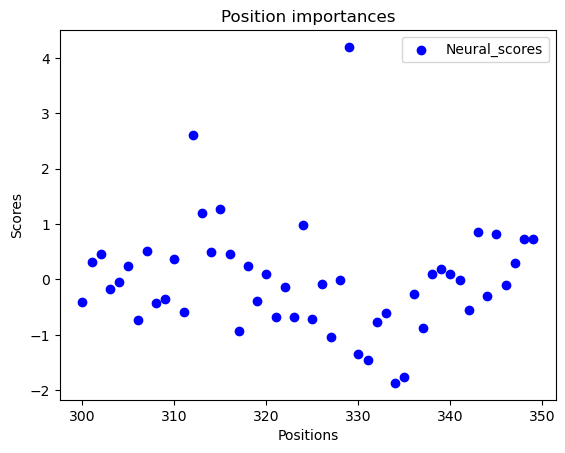

Got to iteration 29 in 365.258273601532 seconds
Epoch [1/15], Training Loss: 0.2396
Epoch [1/15], Validation Loss: 0.1861
Epoch [1/15], Validation Accuracy: 94.1458%
Epoch [2/15], Training Loss: 0.1899
Epoch [2/15], Validation Loss: 0.1203
Epoch [2/15], Validation Accuracy: 96.5758%
Epoch [3/15], Training Loss: 0.1403
Epoch [3/15], Validation Loss: 0.1105
Epoch [3/15], Validation Accuracy: 96.7599%
Epoch [4/15], Training Loss: 0.1739
Epoch [4/15], Validation Loss: 0.1000
Epoch [4/15], Validation Accuracy: 97.2570%
Epoch [5/15], Training Loss: 0.1168
Epoch [5/15], Validation Loss: 0.0982
Epoch [5/15], Validation Accuracy: 97.3306%
Epoch [6/15], Training Loss: 0.0998
Epoch [6/15], Validation Loss: 0.0990
Epoch [6/15], Validation Accuracy: 97.3122%
Epoch [7/15], Training Loss: 0.1578
Epoch [7/15], Validation Loss: 0.1052
Epoch [7/15], Validation Accuracy: 97.0729%
Epoch [8/15], Training Loss: 0.0823
Epoch [8/15], Validation Loss: 0.0978
Epoch [8/15], Validation Accuracy: 97.2938%
Epoch [9

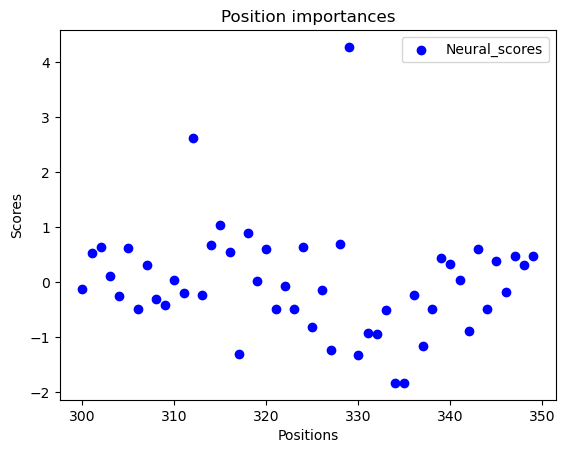

Got to iteration 30 in 377.9595777988434 seconds


In [198]:
best_params_nn = {'layer_dim': 64, 'number_hidden_layer': 3, 'dropout_prob': 0.2, 'l2_regu': 1e-05, 'weight_decay': 0.0001, 'learning_rate': 0.001, 'batch_size': 128, 'num_epochs': 15}
number_hidden_layer = best_params_nn['number_hidden_layer']
dropout_prob = best_params_nn['dropout_prob']
l2_regu = best_params_nn['l2_regu']
weight_decay = best_params_nn['weight_decay']
learning_rate = best_params_nn['learning_rate']
batch_size = best_params_nn['batch_size']
num_epochs = best_params_nn['num_epochs']

positions_to_keep =range(300,350)
level3_extracted = extract_positions(level3,positions_to_keep)

output_dim = 6
tic = time.time()

dfs = []
for i in range(30):
    
    train, train_label, test, test_label, val, val_label=split_dataset(level3_extracted, 0.8, 0.1, 0.1)
    input_dim = train.shape[1]
    
    model_neural = ModelClassification(input_dim, output_dim, layer_dim, number_hidden_layer, dropout_prob, l2_regu)
    optimizer = torch.optim.Adam(model_neural.parameters(), lr = learning_rate, weight_decay=weight_decay)#lr : learning rate
    train_model(model_neural, num_epochs, train, train_label, test, test_label, optimizer, batch_size)
    
    dfs.append(feature_importances_neural(model_neural, level3_extracted, smoothness = 0, pos =positions_to_keep, plot = 1))
    t = time.time() - tic
    print(f"Got to iteration {i+1} in {t} seconds")
    
    

arrays = [df.to_numpy() for df in dfs]

stacked_array = np.stack(arrays, axis=0)
mean_values = np.mean(stacked_array, axis=0)
std_values = np.std(stacked_array, axis=0)


np.savetxt('mean.txt', mean_values)
np.savetxt('std.txt', std_values)

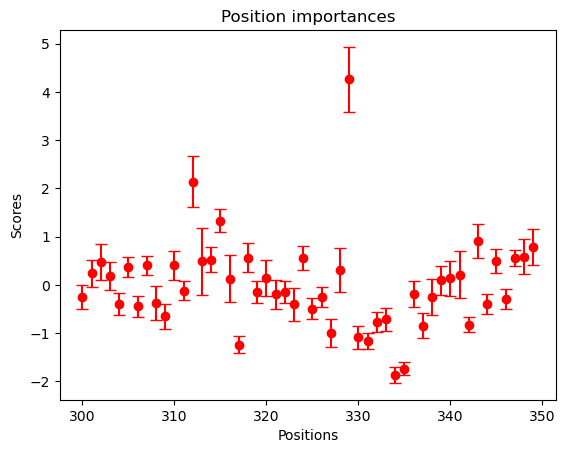

In [199]:
plt.errorbar(positions_to_keep, mean_values[:, 0],std_values[:, 0],capsize =4, color="red",fmt="o") 


plt.xlabel('Positions')
plt.ylabel('Scores')
plt.title('Position importances')
plt.savefig('Postitionimportances_200-350_97acc.png')
plt.show()


## 7. Features importance
This section computes the features importance in both model and standardizes them. They are then plotted in comparison with the mutual informations to be able to see which region of the sequence is more important for the task. Note that the signal is filtered through a moving average of size `smoothness`. The first cell contains the feature importance calculated by all models and the second is just the feature importance in the neural network However, the importance is divided between each class to observe whether they match. We provide 2 .pkl files to be able to visualize the importances without the need to run the entire notebook. If you want to compute the features importance of the models trained, do not run the first cell.

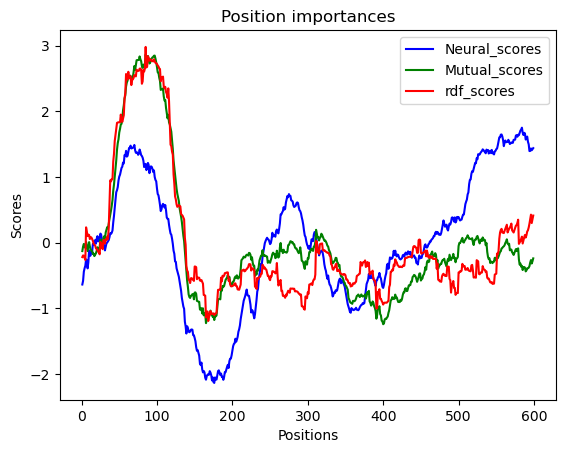

,Neural_scores,Mutual_scores,rdf_scores
pos_1,-0.635912,-0.126754,-0.217961
pos_2,-0.580478,-0.057838,-0.192978
pos_3,-0.441222,-0.018056,-0.196879
pos_4,-0.388720,-0.053526,-0.230814
pos_5,-0.349460,-0.079059,-0.262495
...,...,...,...
pos_595,1.397936,-0.300676,0.359578
pos_596,1.435891,-0.263739,0.427610
pos_597,1.408192,-0.316336,0.300138
pos_598,1.425696,-0.282011,0.359709


In [18]:
feature_importances(model_rdf, model_neural, mutual_data, level3, smoothness = 80, plot = 1)

In [ ]:
features_impo = pd.read_pickle('features_impo.pkl')
features_impo_nn = pd.read_pickle('features_impo_nn.pkl')

In [ ]:
features_impo = feature_importances(model_rdf, model_neural, mutual_data, level3, smoothness = 30)
features_impo.to_pickle("features_impo.pkl")

In [ ]:
features_impo_nn = features_importances_nn(model_neural, level3, smoothness = 30, plot=1)
features_impo_nn.to_pickle("features_impo_nn.pkl")

## Plot finaux

In [10]:
best_params_nn = {'layer_dim': 128, 'number_hidden_layer': 3, 'dropout_prob': 0.2, 'l2_regu': 1e-05, 'weight_decay': 0.0001, 'learning_rate': 0.0001, 'batch_size': 256, 'num_epochs': 10}
layer_dim = best_params_nn['layer_dim']
number_hidden_layer = best_params_nn['number_hidden_layer']
dropout_prob = best_params_nn['dropout_prob']
l2_regu = best_params_nn['l2_regu']
weight_decay = best_params_nn['weight_decay']
learning_rate = best_params_nn['learning_rate']
batch_size = best_params_nn['batch_size']
num_epochs = best_params_nn['num_epochs']


best_para = ({'n_estimators': 100, 'max_depth': 400, 'max_features': 400, 'bootstrap': False, 'class_weight': 'balanced', 'min_samples_leaf': 5}, 0, 0)

dfs = []
for i in range(30):
    
    
    train, train_label, test, test_label, val, val_label=split_dataset(level3, 0.9, 0.1, 0)
    
    model_rdf = train_random_forest(train, train_label,test, test_label,best_para[0])
    model_neural = ModelClassification(input_dim, output_dim, layer_dim, number_hidden_layer, dropout_prob, l2_regu)
    optimizer = torch.optim.Adam(model_neural.parameters(), lr = learning_rate, weight_decay=weight_decay)#lr : learning rate
    train_model(model_neural, num_epochs, train, train_label, test, test_label, optimizer, batch_size)
    
    dfs.append(feature_importances(model_rdf, model_neural, mutual_data, level3, smoothness = 40, plot = 0))

    mutual_data = compute_mutual_info(level3,1)
    
    
    

arrays = [df.to_numpy() for df in dfs]

stacked_array = np.stack(arrays, axis=0)
mean_values = np.mean(stacked_array, axis=0)
std_values = np.std(stacked_array, axis=0)


np.savetxt('mean.txt', mean_values)
np.savetxt('std.txt', std_values)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\pierr\anaconda3\envs\Cuda\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\pierr\AppData\Local\Temp\ipykernel_66192\1665171161.py", line 18, in <module>
    train, train_label, test, test_label, val, val_label=split_dataset(level3, 0.9, 0.1, 0)
                                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pierr\Desktop\Semester_project_Ma2\create_batch.py", line 63, in split_dataset
    train_set = torch.tensor(trainset.iloc[:, 1:].values, dtype=torch.float32)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

During handling of the above exception, another exception occurred:

Traceb

In [30]:
mean_values = np.loadtxt('mean.txt',dtype=float)
std_values = np.loadtxt('std.txt',dtype=float)



plt.plot(np.arange(mean_values.shape[0]), mean_values[:, 0],label='Neural Network', color="red", lw=2) 

plt.fill_between(
    np.arange(mean_values.shape[0]),
    mean_values[:, 0] - std_values[:, 0],
    mean_values[:, 0] + std_values[:, 0],
    color="red",
    alpha=0.3 
)
plt.plot(np.arange(mean_values.shape[0]), mean_values[:, 1], label='Mutual Information', color="green", lw=2) 
plt.fill_between(
    np.arange(mean_values.shape[0]),
    mean_values[:, 1] - std_values[:, 1],
    mean_values[:, 1] + std_values[:, 1],
    color="green",
    alpha=0.3 
)
plt.plot(np.arange(mean_values.shape[0]), mean_values[:, 2], label='Random forest', color="blue", lw=2) 
plt.fill_between(
    np.arange(mean_values.shape[0]),
    mean_values[:, 2] - std_values[:, 2],
    mean_values[:, 2] + std_values[:, 2],
    color="blue",
    alpha=0.3 
)


plt.xlabel('Positions')
plt.ylabel('Scores')
plt.title('Position importances')
plt.legend()

plt.show()


FileNotFoundError: mean.txt not found.